# <font color='#0E6655'> <b> <center> CUSTOMER SEGMENTATION </center> </b> </font>

TABLA DE CONTENIDO...

<a name="1"></a> 
## <font color='green'> <b> 1. Objectives </font> </a>

Use K-Means for customer segmentation.

<a name="2"></a> 
## <font color='green'> <b> 2. Modules </font> </a>

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


<a name="3"></a> 
## <font color='green'> <b> 3. Helper Functions </font> </a>

<a name="4"></a> 
## <font color='green'> <b> 4. Data loading, exploration and pre-processing </font> </a>

In [4]:
!cd data && ls

Customer_Segmentation.csv


In [10]:
df = pd.read_csv('data/Customer_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,124.0,1073.0,6.3
1,2,47,1,26,100,4582.0,8218.0,12.8
2,3,33,2,10,57,6111.0,5802.0,20.9
3,4,29,2,4,19,681.0,516.0,6.3
4,5,47,1,31,253,9308.0,8908.0,7.2


In [11]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

We can see that all variables are numerical and we have no null values.
Our next step will be standarize this numerical features.

In [14]:
X = df.values[:,1:] # we take all values except of course the index in the dataframe
X = np.nan_to_num(X)

# normalize
X = StandardScaler().fit_transform(X)

In [15]:
X[:2]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.62196731,
        -0.52096003, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.49318129,
         1.55956554,  0.39138677]])

<a name="5"></a> 
## <font color='green'> <b> 5. Clustering </font> </a>

We're implementing K-means. To determine the optimal value of K, we'll utilize the elbow method.

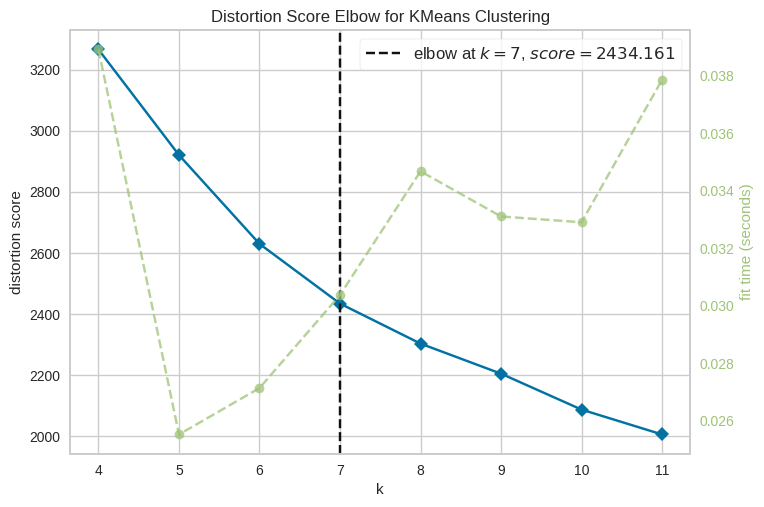

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

With this method, the best value of k is 7.

In [23]:
# number of clusters
num_clusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# labels
kmeans.labels_[0:10] 

array([1, 3, 3, 2, 6, 5, 1, 0, 2, 5], dtype=int32)

In [25]:
# insert the labels
df.insert(0, 'Cluster Labels', kmeans.labels_) #df["Clus_km"] = labels
df.head()

ValueError: cannot insert Cluster Labels, already exists

In [26]:
df.head()

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,1,41,2,6,19,124.0,1073.0,6.3
1,3,2,47,1,26,100,4582.0,8218.0,12.8
2,3,3,33,2,10,57,6111.0,5802.0,20.9
3,2,4,29,2,4,19,681.0,516.0,6.3
4,6,5,47,1,31,253,9308.0,8908.0,7.2


VISUALIZE CLUSTERS

In [28]:
df.loc[df['Cluster Labels'] == 0]

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
7,0,8,42,3,0,64,279.00,3945.0,6.6
10,0,11,44,3,8,88,285.00,5083.0,6.1
14,0,15,28,3,2,20,233.00,1647.0,9.4
17,0,18,43,4,1,26,1519.00,1237.0,10.6
21,0,22,36,3,10,43,961.00,4629.0,13.0
...,...,...,...,...,...,...,...,...,...
823,0,824,27,4,0,25,1419.00,1756.0,12.7
828,0,829,45,3,0,22,0.03,894.0,4.2
833,0,834,30,4,7,30,264.00,4446.0,15.7
840,0,841,38,3,13,25,343.00,1082.0,5.7


In [29]:
df.loc[df['Cluster Labels'] == 1]

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,1,41,2,6,19,124.0,1073.0,6.3
6,1,7,38,2,4,56,442.0,454.0,1.6
11,1,12,34,2,9,40,374.0,266.0,1.6
19,1,20,36,1,16,32,544.0,2944.0,10.9
25,1,26,43,1,9,66,2341.0,3467.0,8.8
...,...,...,...,...,...,...,...,...,...
822,1,823,45,1,3,20,105.0,315.0,2.1
827,1,828,50,1,1,26,1852.0,1866.0,14.3
842,1,843,32,1,14,36,273.0,591.0,2.4
844,1,845,41,1,7,43,694.0,1198.0,4.4


In [31]:
df.loc[df['Cluster Labels'] == 2]

,Cluster Labels,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
3,2,4,29,2,4,19,681.00,516.00,6.3
8,2,9,26,1,5,18,575.00,2215.00,15.5
12,2,13,24,1,7,18,526.00,643.00,6.5
15,2,16,24,1,1,16,185.00,1287.00,9.2
16,2,17,29,1,1,17,132.00,293.00,2.5
...,...,...,...,...,...,...,...,...,...
838,2,839,26,1,10,25,1306.00,469.00,7.1
839,2,840,31,1,8,22,0.37,1104.00,6.7
843,2,844,32,2,8,45,982.00,683.00,3.7
845,2,846,27,1,5,26,548.00,1.22,6.8


In [40]:
df.groupby('Cluster Labels').mean() #Podemos cheqeuar los valores de los centroides promediando las características en cada cluster.

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Cluster Labels,,,,,,,,
0,409.727273,33.070707,3.444444,4.404040,41.010101,884.579798,2267.954848,8.608081
1,433.628319,39.141593,1.230088,10.584071,41.955752,871.078761,1782.162655,7.472566
2,425.000000,28.062500,1.371094,4.140625,25.355469,512.156211,1126.999023,7.541797
3,433.589041,41.054795,2.054795,14.013699,80.520548,4231.047123,9105.917808,17.710959
4,433.000000,32.627273,1.554545,5.872727,31.327273,2026.046909,3600.464455,20.394545
5,402.277778,44.958333,1.888889,19.541667,101.847222,1500.666250,3178.225417,5.588889
6,433.285714,46.285714,1.928571,22.642857,213.142857,11737.785714,16239.857143,16.821429


In [74]:


elements_per_cluster = [len(df.loc[df['Cluster Labels'] == n].index) for n in range(0,num_clusters)]



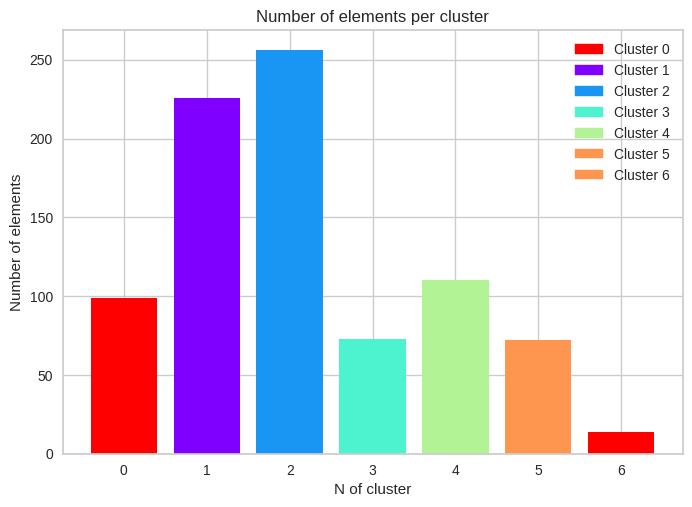

In [75]:
# number of elemets por cluster
x = [0,1,2,3,4,5,6]

color = ['#ff0000', '#8000ff', '#1996f3', '#4df3ce', '#b2f396', '#ff964f','red']

plt.bar(x,elements_per_cluster,color=color)

plt.title('Number of elements per cluster')
plt.xlabel('N of cluster')
plt.ylabel('Number of elements')

colors = {'Cluster 0':'red', 'Cluster 1':'#8000ff', 'Cluster 2':'#1996f3','Cluster 3':'#4df3ce',
         'Cluster 4':'#b2f396','Cluster 5':'#ff964f', 'Cluster 6':'#ff964f'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

/tmp/ipykernel_287471/3974005358.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)


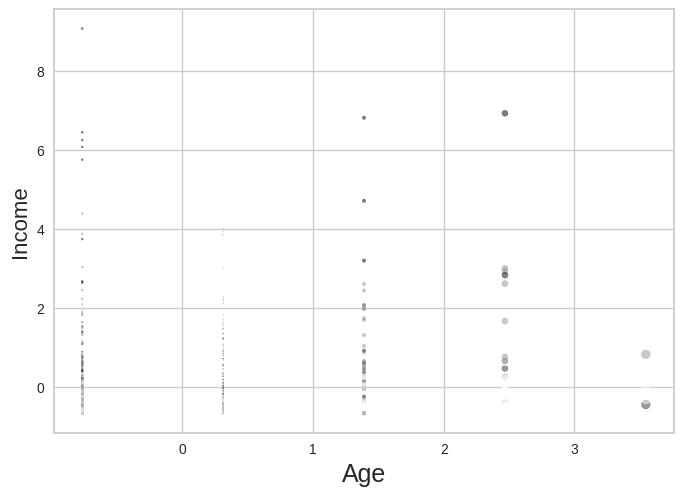

In [51]:
# distribution based in age and income

labels = kmeans.labels_

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

In [64]:
aux = df.values[:,1:] 

/tmp/ipykernel_287471/482556329.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(aux[:, 1], aux[:, 4], c=kmeans.labels_.astype(np.float) ,s=area, alpha=0.5)


ValueError: 'c' argument has 300 elements, which is inconsistent with 'x' and 'y' with size 850.

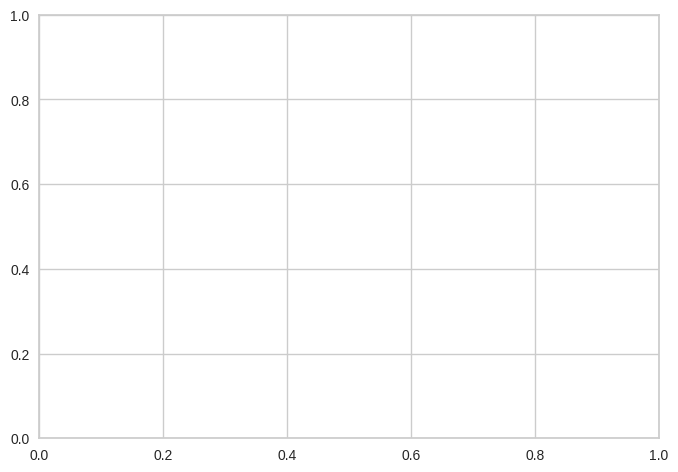

In [70]:
labels = kmeans.labels_

area = np.pi * ( aux[:, 1])**2*0.01
plt.scatter(aux[:, 1], aux[:, 4], c=kmeans.labels_.astype(np.float) ,s=area, alpha=0.5)
plt.xlabel('Age', fontsize=8)
plt.ylabel('Income', fontsize=4)

plt.show()

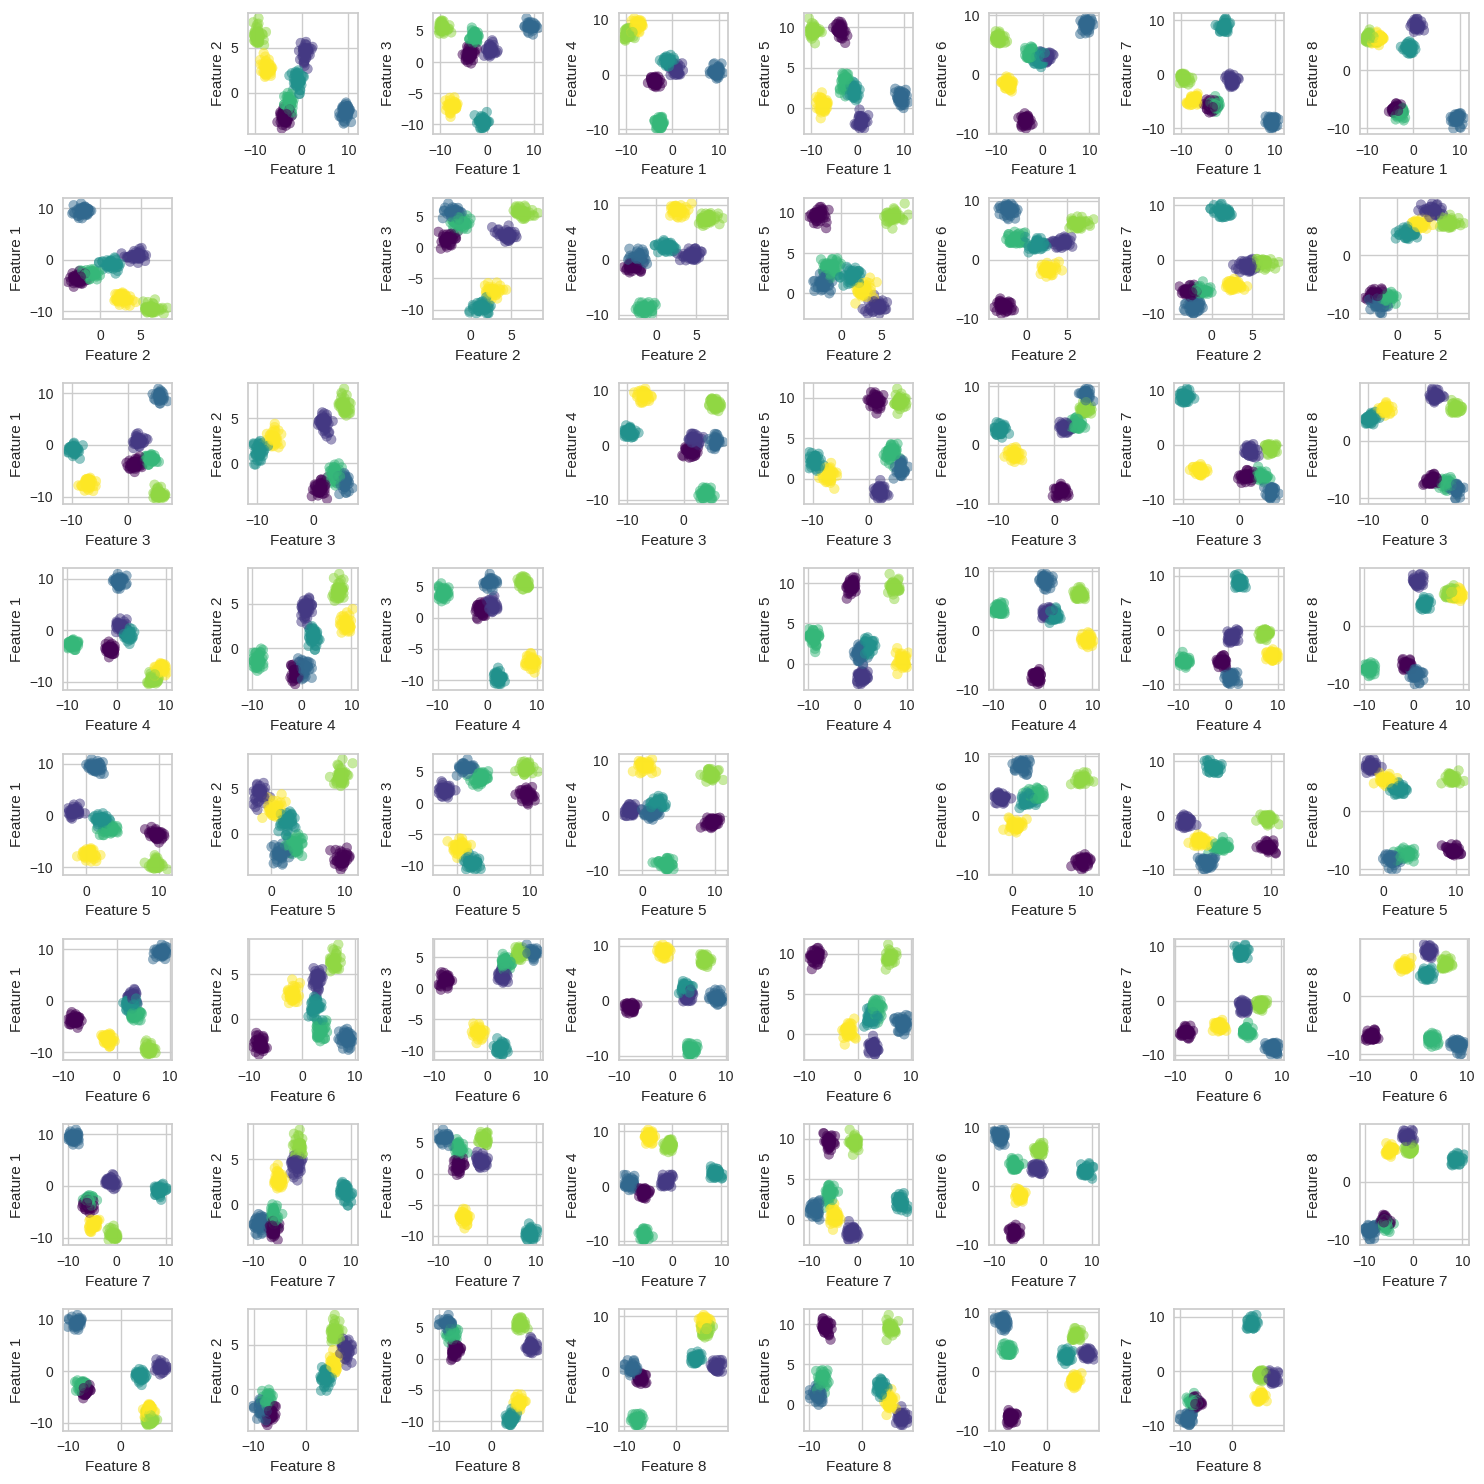

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=7, cluster_std=0.60, random_state=0, n_features=8)

# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Create pairwise scatter plots for each combination of two features
num_features = X.shape[1]

fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(X[:, i], X[:, j], c=labels, cmap='viridis', alpha=0.5)
            axes[i, j].set_xlabel('Feature {}'.format(i+1))
            axes[i, j].set_ylabel('Feature {}'.format(j+1))
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


/home/marcos/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/marcos/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/tmp/ipykernel_287471/1543937019.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster')


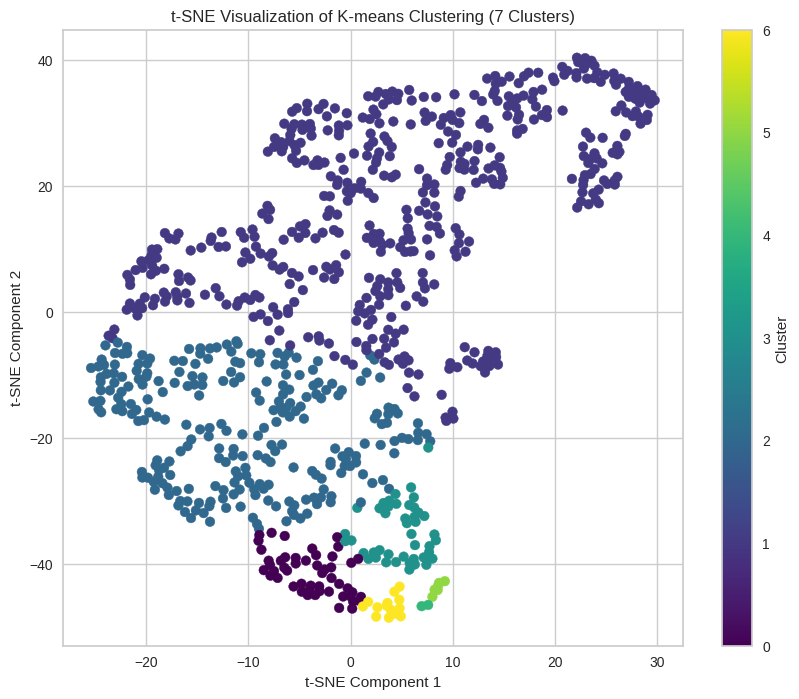

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=7, cluster_std=0.60, random_state=0, n_features=8)


X = df.values

# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization of K-means Clustering (7 Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


/tmp/ipykernel_287471/745253036.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster')


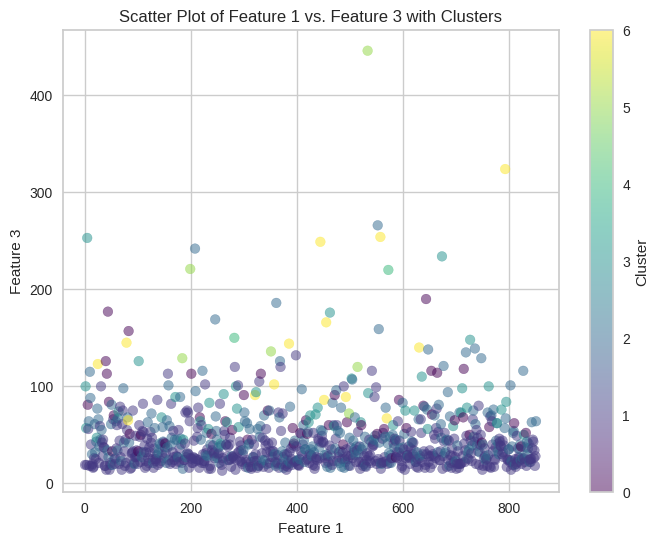

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 5], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Scatter Plot of Feature 1 vs. Feature 3 with Clusters')
plt.colorbar(label='Cluster')
plt.show()

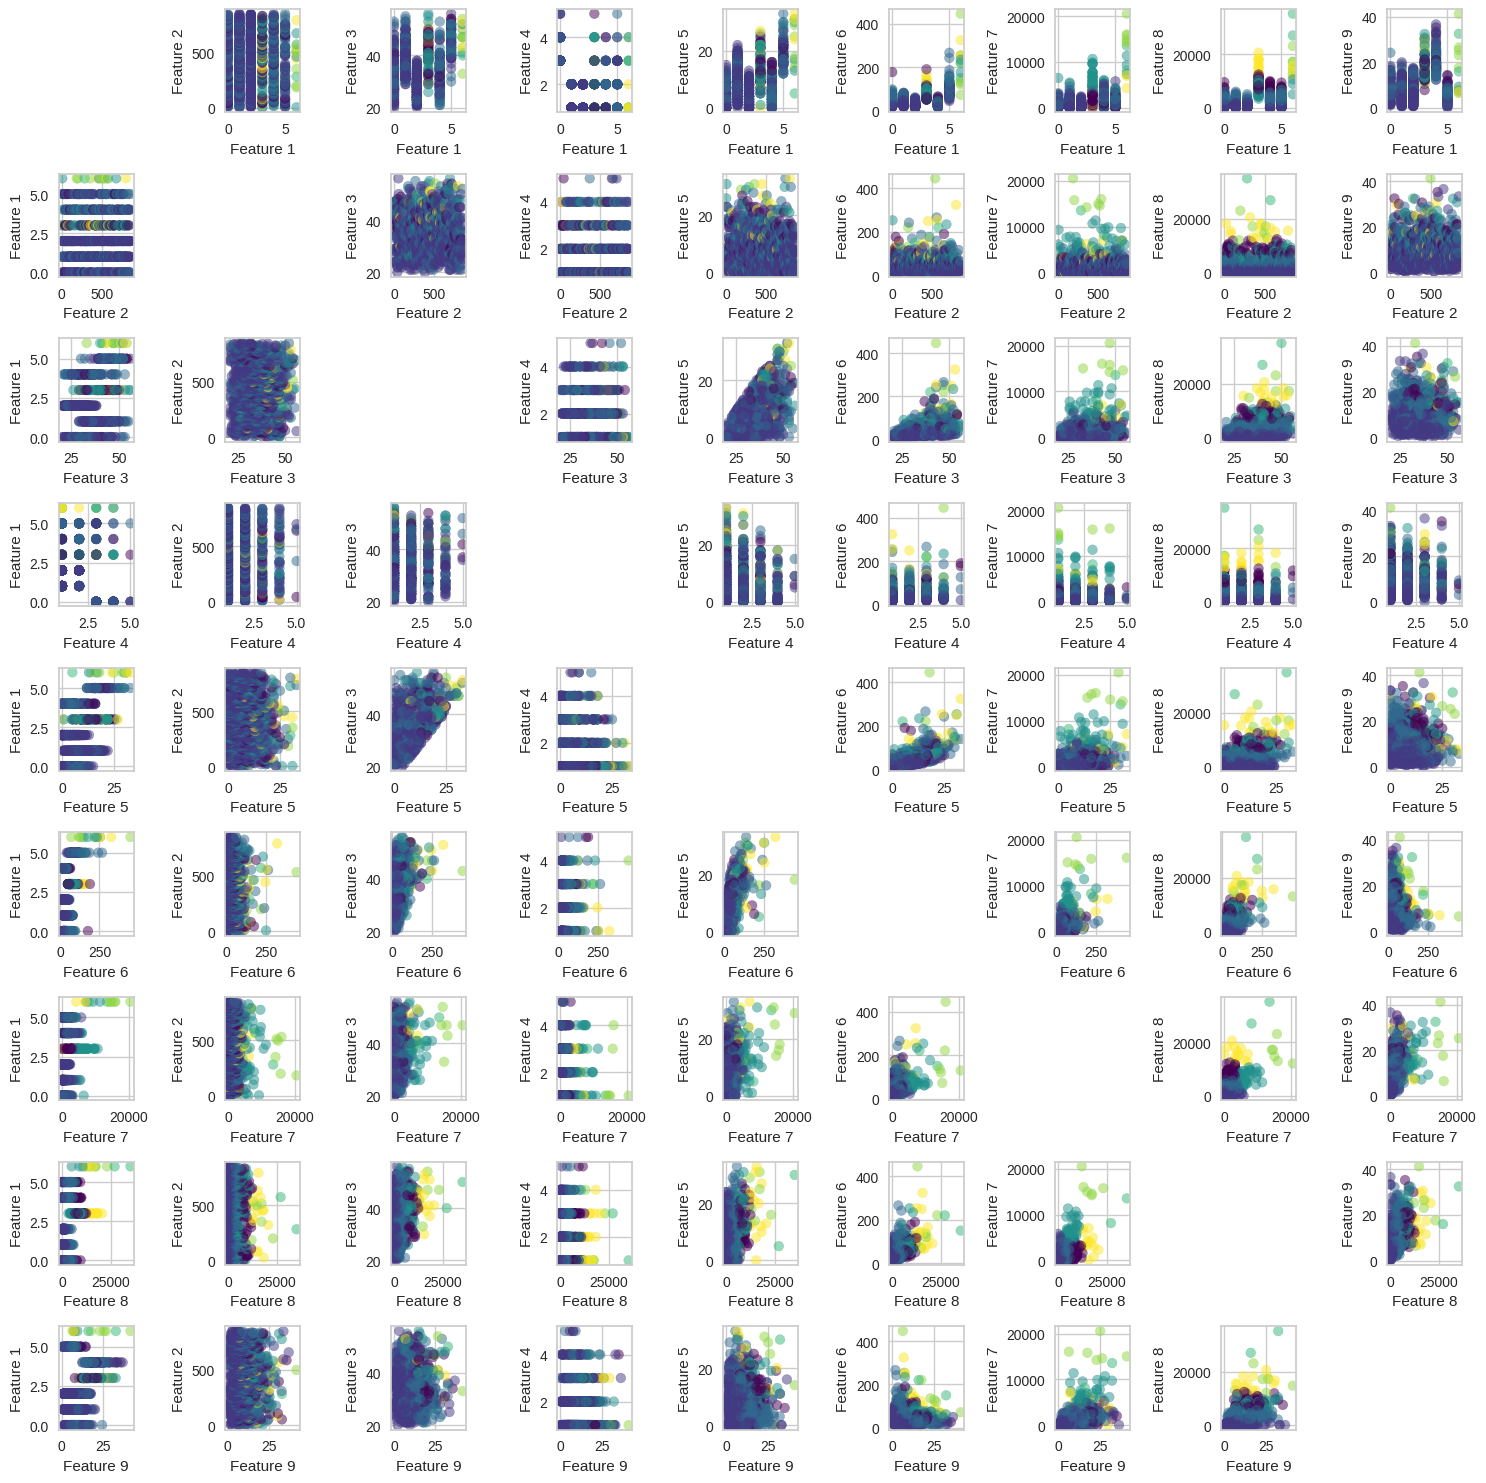

In [80]:
# Generate sample data
X = df.values

# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Create pairwise scatter plots for each combination of two features
num_features = X.shape[1]

fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(X[:, i], X[:, j], c=labels, cmap='viridis', alpha=0.5)
            axes[i, j].set_xlabel('Feature {}'.format(i+1))
            axes[i, j].set_ylabel('Feature {}'.format(j+1))
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [87]:
df.columns


Index(['Cluster Labels', 'Customer Id', 'Age', 'Edu', 'Years Employed',
       'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio'],
      dtype='object')

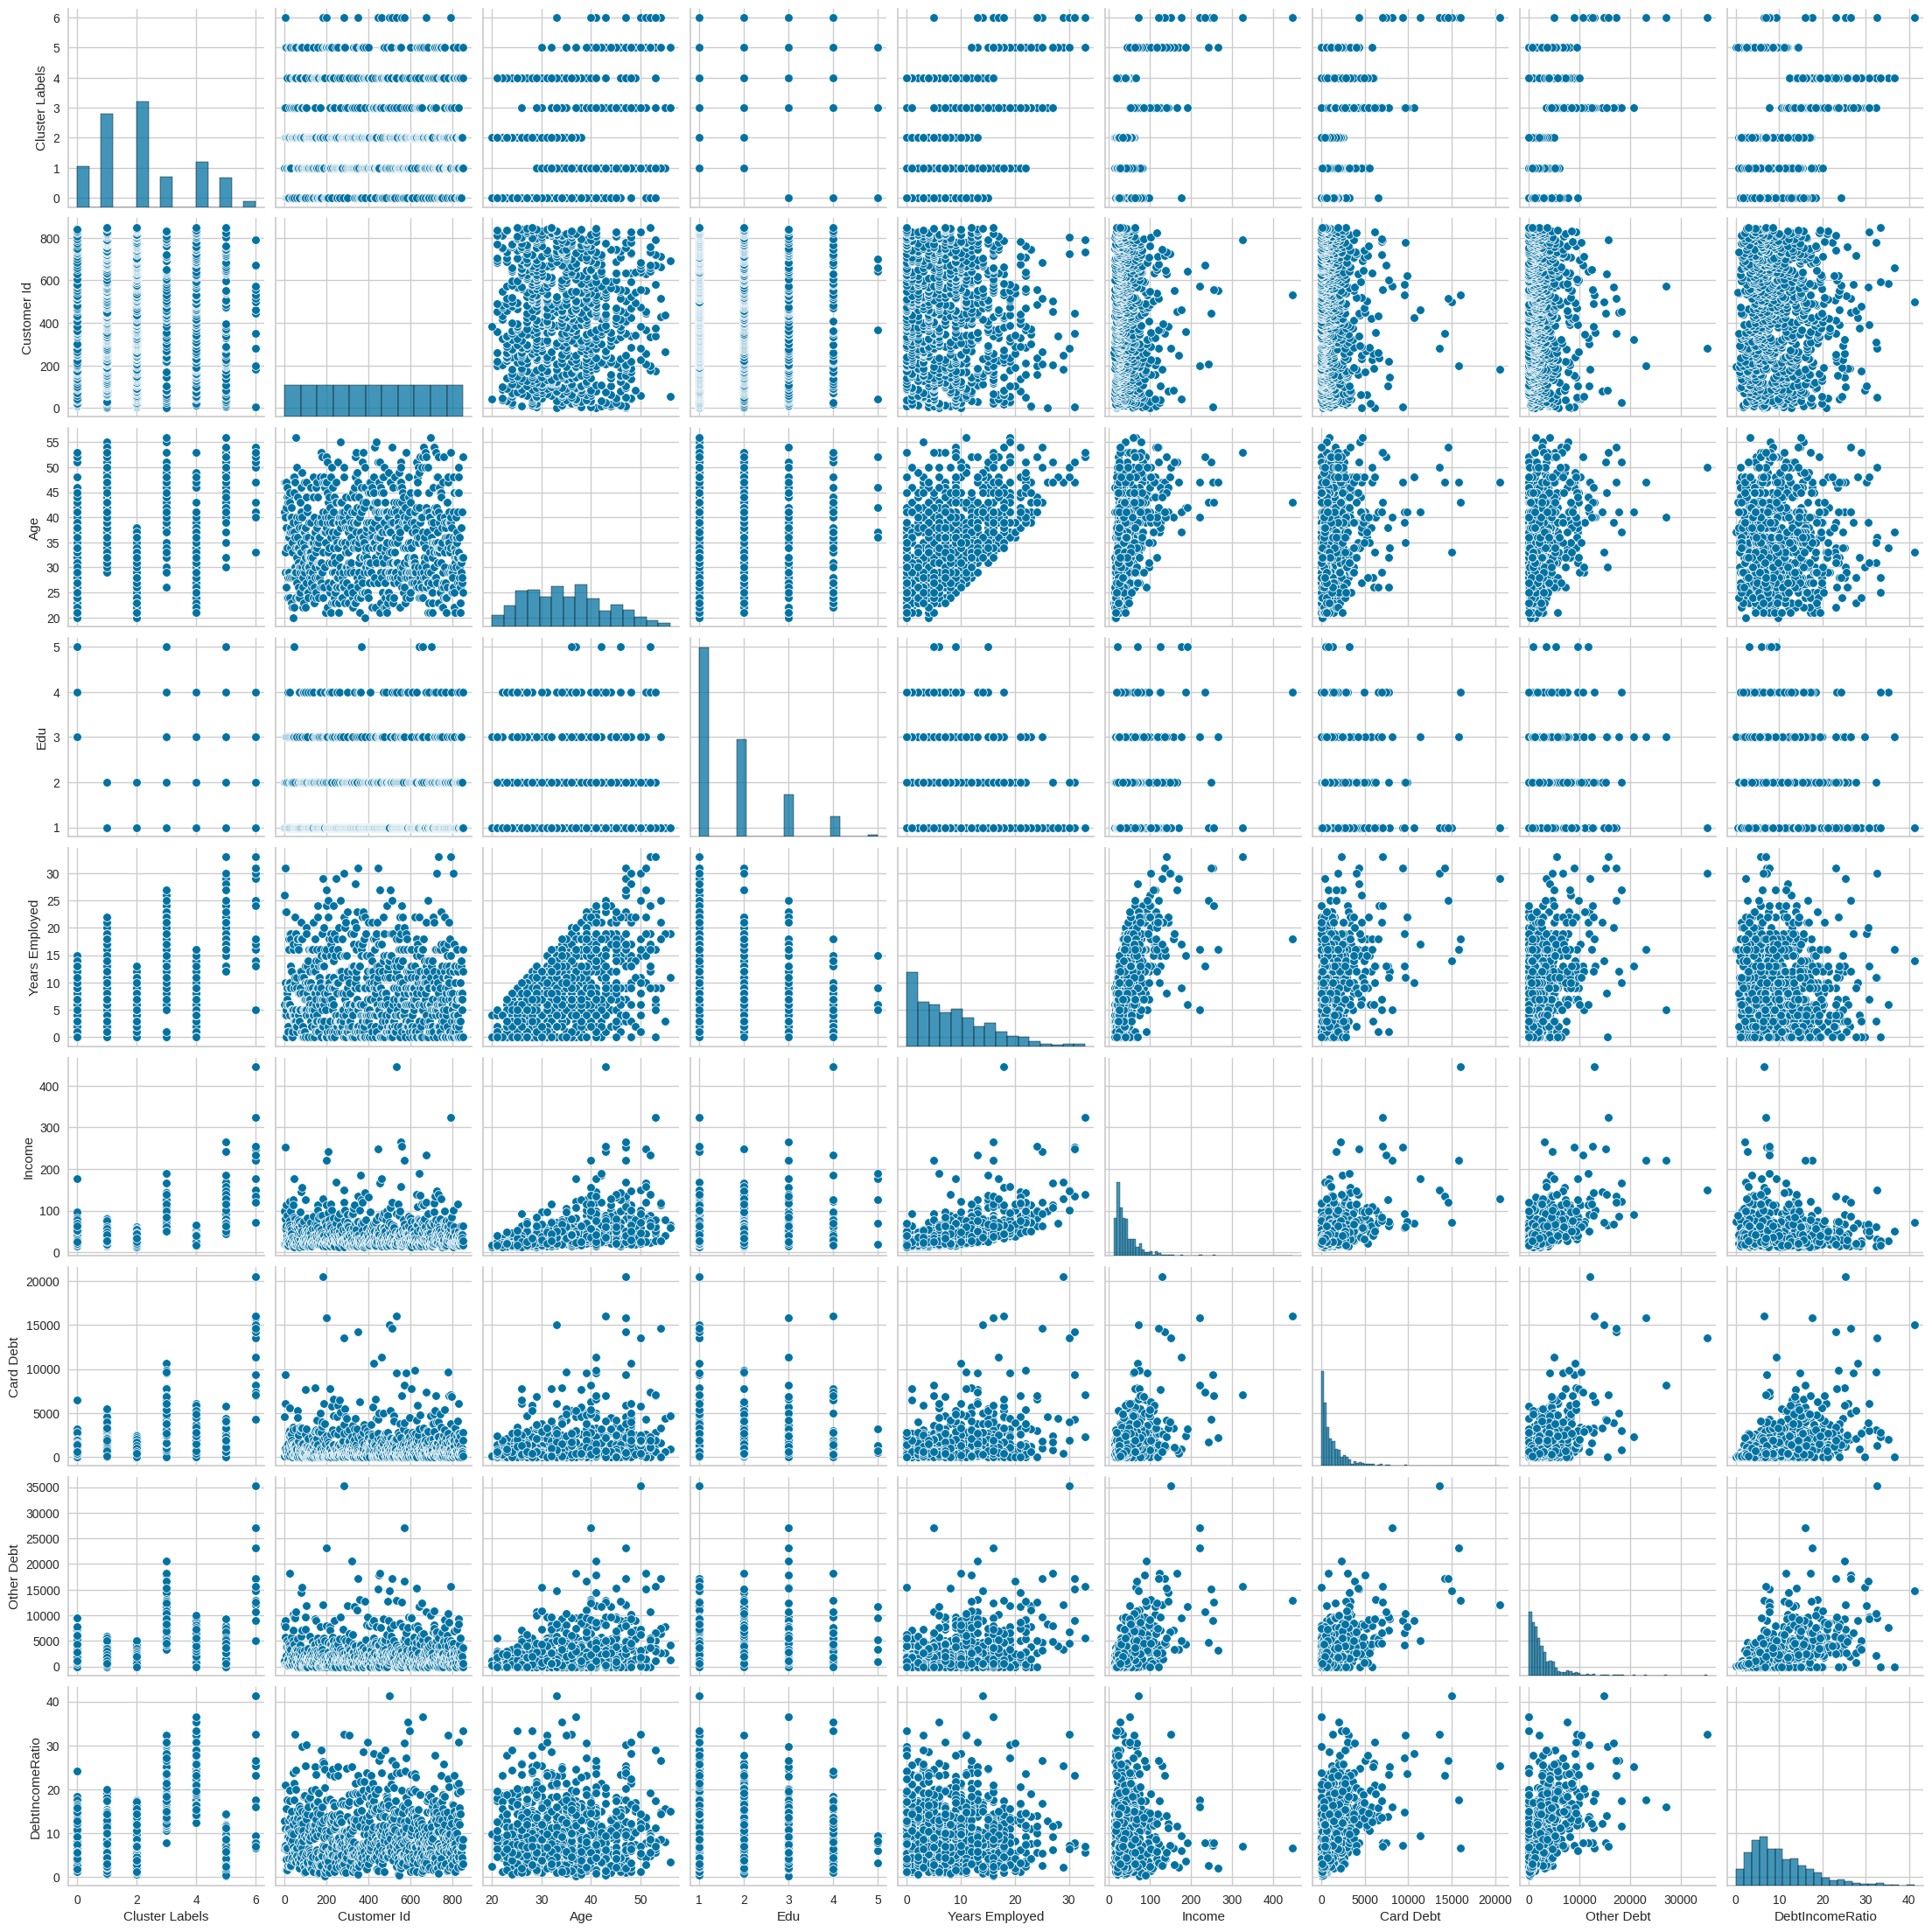

In [89]:
import seaborn as sns

sns.pairplot(df)